In [211]:
import pandas as pd

In [212]:
X = pd.read_csv('datasets/Titanic/train.csv')
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [213]:
X = X.drop(['PassengerId', 'Ticket', 'Name', 'Embarked'], axis = 1)
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


In [214]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [215]:
X.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [216]:
from sklearn import preprocessing

def func(i):
    if type(i)==str:
        return i[0]
    return 'N'

X['Cabin'] = X['Cabin'].apply(func)


le = preprocessing.LabelEncoder()
X['Age'].fillna(method='ffill', inplace = True)


X['Cabin'] = le.fit_transform(X['Cabin'])
X['Sex'] = le.fit_transform(X['Sex'])

X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,1,22.0,1,0,7.2500,7
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,7
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,7


In [217]:
y = X['Survived']
X.drop(['Survived'], axis = 1, inplace = True)

In [218]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [219]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X, y, cv=3, scoring="accuracy").mean()

0.5735129068462402

In [220]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X, y, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_train_pred)

array([[248, 301],
       [ 79, 263]])

In [221]:
from sklearn.metrics import f1_score
f1_score(y, y_train_pred)

0.5805739514348787

In [222]:
from sklearn import tree
DTClass = tree.DecisionTreeClassifier(max_depth=5)
DTClass.fit(X, y)
DTClass.score(X, y)

0.8540965207631874

In [223]:
DTClass.feature_importances_

array([0.13947117, 0.54441192, 0.1188772 , 0.02870855, 0.01726261,
       0.08380746, 0.06746108])

In [224]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,1,22.0,1,0,7.2500,7
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,7
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,7


In [225]:
from sklearn import ensemble
RFClass = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
RFClass.fit (X, y)
RFClass.score (X, y)

0.9876543209876543

In [226]:
from sklearn.model_selection import cross_val_score
cross_val_score(RFClass, X, y, cv=10, scoring='accuracy').mean()

0.8037535467029849

In [227]:
RFClass.feature_importances_

array([0.07002983, 0.25583941, 0.26947019, 0.04468482, 0.03733889,
       0.25501174, 0.06762511])

In [228]:
GBClass = ensemble.GradientBoostingClassifier(n_estimators=100)
GBClass.fit (X, y)
GBClass.score (X, y)

0.8956228956228957

In [229]:
from sklearn.model_selection import cross_val_score
cross_val_score(GBClass, X, y, cv=10, scoring='accuracy').mean()

0.8238151174668029

In [230]:
GBClass.feature_importances_

array([0.12538709, 0.48585369, 0.14106557, 0.02328125, 0.00678738,
       0.15529389, 0.06233113])

In [231]:
predictions = cross_val_predict(GBClass, X, y, cv=3)

confusion_matrix(y, predictions)
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y, predictions))
print("Recall:",recall_score(y, predictions))
from sklearn.metrics import f1_score
f1_score(y, predictions)

Precision: 0.7781456953642384
Recall: 0.6871345029239766


0.7298136645962733

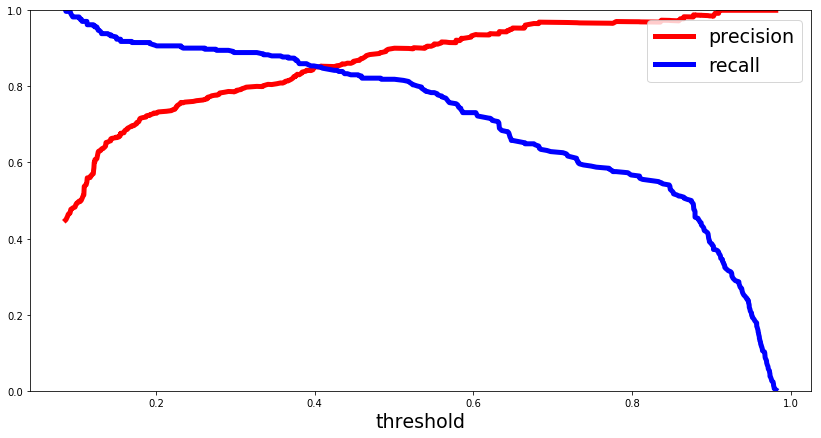

In [232]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = GBClass.predict_proba(X)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y, y_scores)

%matplotlib inline
from matplotlib import pyplot as plt

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

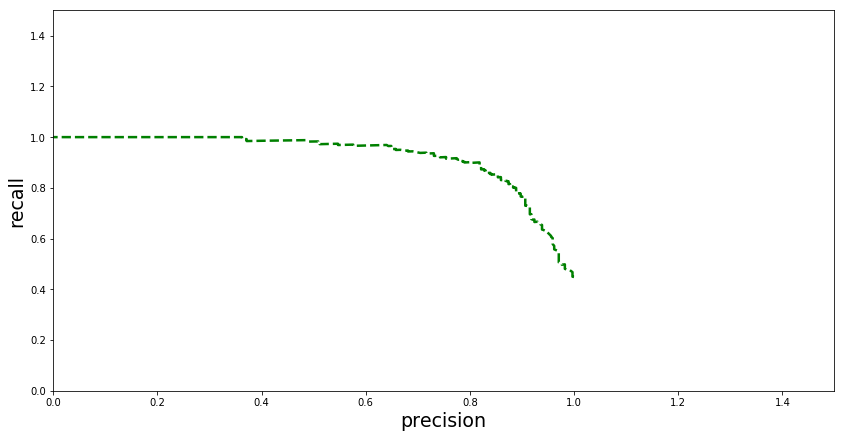

In [233]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

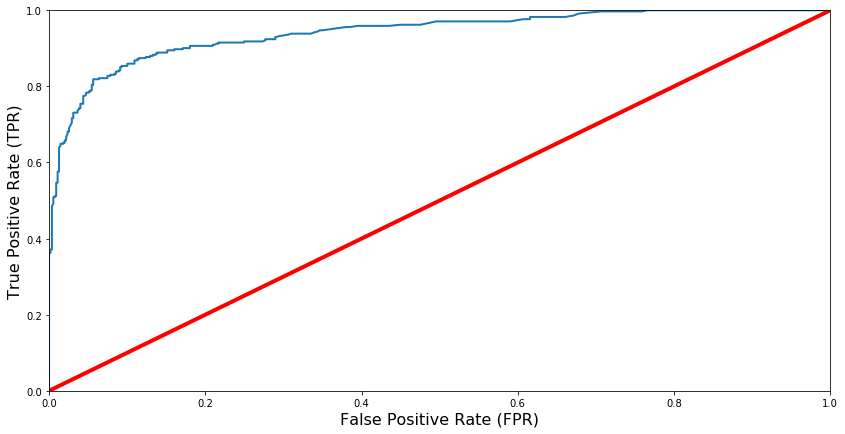

ROC-AUC-Score: 0.9409079772899158


In [234]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_scores)

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y, y_scores)
print("ROC-AUC-Score:", r_a_score)

In [235]:
X_test = pd.read_csv('datasets/Titanic/test.csv')
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [236]:
X_test.drop(['PassengerId', 'Ticket', 'Name', 'Embarked'], axis = 1, inplace=True)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,male,34.5,0,0,7.8292,NaN
1,3,female,47.0,1,0,7.0000,NaN
2,2,male,62.0,0,0,9.6875,NaN
3,3,male,27.0,0,0,8.6625,NaN
4,3,female,22.0,1,1,12.2875,NaN


In [237]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       332 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
Cabin     91 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [238]:
X_test['Cabin'] = X_test['Cabin'].apply(func)

le = preprocessing.LabelEncoder()
X_test['Age'].fillna(method='ffill', inplace = True)

X_test['Fare'].fillna(method='ffill', inplace=True)
X_test['Cabin'] = le.fit_transform(X_test['Cabin'])
X_test['Sex'] = le.fit_transform(X_test['Sex'])

In [239]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,1,34.5,0,0,7.8292,7
1,3,0,47.0,1,0,7.0000,7
2,2,1,62.0,0,0,9.6875,7
3,3,1,27.0,0,0,8.6625,7
4,3,0,22.0,1,1,12.2875,7


In [240]:
df = pd.DataFrame()
Xt = pd.read_csv('datasets/Titanic/test.csv')
df['PassengerId'] = Xt['PassengerId']
df['Survived'] = GBClass.predict(X_test)
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [241]:
df.to_csv('predictions.csv')

In [242]:
# Submitted to Kaggle, Scored : 0.74162